<a href="https://colab.research.google.com/github/Sakshamg0126/The-Clean-City-Waste-Sorter/blob/main/Waste_Sorter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import requests
import zipfile

# 1. Define the direct download link (Reliable backup source)
url = "https://huggingface.co/datasets/garythung/trashnet/resolve/main/dataset-resized.zip"
zip_name = "dataset-resized.zip"

print(f"Downloading {zip_name}...")

# 2. Download the file
response = requests.get(url, stream=True)
with open(zip_name, 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)

print("Download complete. Unzipping...")

# 3. Unzip it
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("trash_data")

# 4. Define the new correct path
# The unzipped folder usually creates a structure like 'dataset-resized/glass/...'
base_dir = "trash_data/dataset-resized"

if os.path.exists(base_dir):
    print("\n✅ SUCCESS! Images are ready.")
    print("Categories found:", os.listdir(base_dir))
else:
    print("\n❌ Error: Folder still not found. Let's check what was unzipped:")
    print(os.listdir("trash_data"))

Download complete. Unzipping...

✅ SUCCESS! Images are ready.
Categories found: ['plastic', 'metal', 'glass', 'paper', '.DS_Store', 'trash', 'cardboard']


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [8]:
data_dir = 'trash_data/dataset-resized'

In [29]:
print("Loading Training DAta:")
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Loading Training DAta:
Found 2024 images belonging to 6 classes.


In [28]:
print("\nLoading Validation Data:")
validation_genrator = datagen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Loading Validation Data:
Found 503 images belonging to 6 classes.


In [11]:
print("\nCategories found:", train_generator.class_indices)


Categories found: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [32]:
#linear Stack of layers
model = Sequential([
    Input(shape=(224,224,3)),#imagesize,color
    Conv2D(32, (3,3), activation='relu'),#Conv2D scan image with 32 filters and relu remove negative value
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),#Flatten Images
    Dense(512, activation='relu'),#neural network with 512 neurons
    Dense(6, activation='softmax')#6 neuron (1 for each category)
])

In [36]:
model.compile(
    loss='categorical_crossentropy',# The standard error formula for multi-class problems
    optimizer ='adam',# The algorithm that updates the brain (very popular/efficient)
    metrics=['accuracy']# We want to see the % accuracy score
)

In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,399,174 (169.37 MB)

 Trainable params: 44,399,174 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
print("Starting training ...(This may take a few miutes)")
history = model.fit(
    train_generator,#Study Materials
    epochs= 15,#Number of Study Materials
    validation_data=validation_genrator#Test Materials
)

Starting training ...(This may take a few miutes)
Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9957 - loss: 0.0221 - val_accuracy: 0.5328 - val_loss: 3.1710
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9830 - loss: 0.0607 - val_accuracy: 0.5388 - val_loss: 3.0317
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.9972 - loss: 0.0182 - val_accuracy: 0.5368 - val_loss: 3.4033
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9992 - loss: 0.0073 - val_accuracy: 0.5189 - val_loss: 3.5251
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9992 - loss: 0.0059 - val_accuracy: 0.5368 - val_loss: 3.8038
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9993 - loss: 0.0101 - val_accuracy: 0.5408 - val_loss: 3.3538
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.9994 - loss: 0.0043 - val_accuracy: 0.5348 - val_loss: 3.3679
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accurac

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [41]:
path = 'test.jpg'
try:
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)#img to list of numbers
  x=x/255.0
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x)
  class_names = list(train_generator.class_indices.keys())#list of materials
  predicted_class = class_names[np.argmax(prediction)]
  confidence = np.max(prediction)*100
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"prediction:{predicted_class} ({confidence:.1f}%)")
  plt.show()
except Exception as e:
  print(f"Error: Could mot load image '{path} . Did you upload it correctly?")
  print(f"Error: {e}")

Error: Could mot load image 'test.jpg . Did you upload it correctly?
Error: [Errno 2] No such file or directory: 'test.jpg'


In [43]:
# Save the trained model to a file
model.save('my_waste_sorter.h5')

print("✅ Model saved as 'my_waste_sorter.h5'")

✅ Model saved as 'my_waste_sorter.h5'


Please upload your image now...


Saving paper20.jpg to paper20.jpg
received: paper20.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


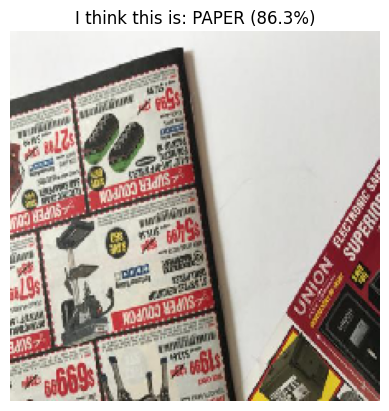

In [46]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. This creates a button to upload files
print("Please upload your image now...")
uploaded = files.upload()

# 2. Get the name of the file you just uploaded
filename = list(uploaded.keys())[0]
print(f"received: {filename}")

# 3. Load and Predict
img = image.load_img(filename, target_size=(224, 224))
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
class_names = list(train_generator.class_indices.keys())
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# 4. Show Result
plt.imshow(img)
plt.axis('off')
plt.title(f"I think this is: {predicted_class.upper()} ({confidence:.1f}%)")
plt.show()